In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def addLinPower(df):
    df['Raw Power (mW)'] = 10**(df['Raw Power (dBm)']/10)
    return df

In [42]:
dipole = pd.read_pickle('rawData/2021-12-31_16-44-00_banannaDipTG_biconSA.pkl')
term_open = pd.read_pickle('rawData/2021-12-31_16-45-42_roomCableToOpenTermTG_biconSA.pkl')
term_50Ohm = pd.read_pickle('rawData/2021-12-31_17-00-10_roomCableTo50OhmTermTG_biconSA.pkl')
term_75Ohm = pd.read_pickle('rawData/2021-12-31_17-01-01_roomCableTo75OhmTermTG_biconSA.pkl')
term_93Ohm = pd.read_pickle('rawData/2021-12-31_17-01-48_roomCableTo93OhmTermTG_biconSA.pkl')

addLinPower(term_open)
addLinPower(term_50Ohm)
addLinPower(term_75Ohm)
addLinPower(term_93Ohm)

;

''

''

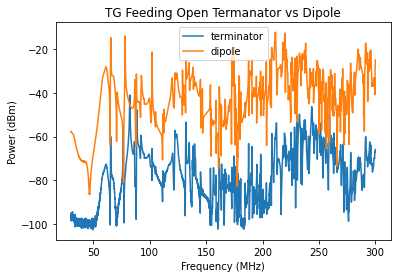

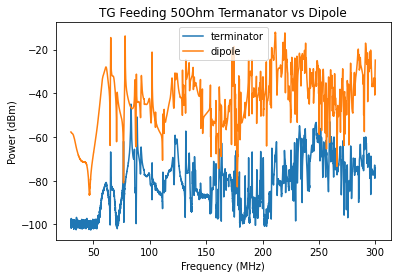

In [50]:
%matplotlib inline
plt.title('TG Feeding Open Termanator vs Dipole')
plt.plot(term_open['Frequency (MHz)'], term_open['Raw Power (dBm)'], label = 'terminator')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (dBm)'], label = 'dipole')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

plt.figure()
plt.title('TG Feeding 50Ohm Termanator vs Dipole')
plt.plot(term_50Ohm['Frequency (MHz)'], term_50Ohm['Raw Power (dBm)'], label = 'terminator')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (dBm)'], label = 'dipole')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')



;

''

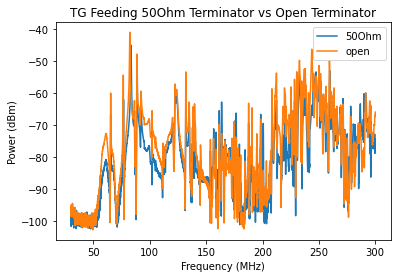

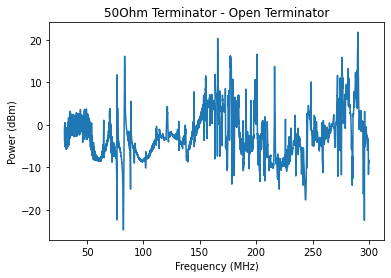

In [54]:
%matplotlib inline
plt.figure()
plt.title('TG Feeding 50Ohm Terminator vs Open Terminator')
plt.plot(term_50Ohm['Frequency (MHz)'], term_50Ohm['Raw Power (dBm)'], label = '50Ohm')
plt.plot(term_open['Frequency (MHz)'], term_open['Raw Power (dBm)'], label = 'open')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

plt.figure()
plt.title('50Ohm Terminator - Open Terminator')
plt.plot(term_50Ohm['Frequency (MHz)'], term_50Ohm['Raw Power (dBm)'] - term_open['Raw Power (dBm)'])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')


;

In [30]:
%matplotlib
plt.plot(withDipole['Frequency (MHz)'], withDipole['Raw Power (dBm)'] - term['Raw Power (dBm)'])

In [25]:
#convert to linear
%matplotlib qt
withDipole['Raw Power (mW)'] = 10**(withDipole['Raw Power (dBm)']/10)
term['Raw Power (mW)'] = 10**(term['Raw Power (dBm)']/10)
plt.plot(withDipole['Frequency (MHz)'], withDipole['Raw Power (dBm)'], label = 'dipole')
plt.plot(withDipole['Frequency (MHz)'], 10*np.log10(withDipole['Raw Power (mW)'] - term['Raw Power (mW)']))


/Users/joseph/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
%matplotlib qt
plt.plot(term['Frequency (MHz)'], term['Raw Power (mW)'], label = 'terminator')
plt.plot(withDipole['Frequency (MHz)'], withDipole['Raw Power (mW)'], label = 'dipole')